# K-Means For Finding Patterns in California Housing Data

#### Load Dataset
It is a table. Each row contains the information of an area in the state of california. Thus, an area in the state of california is an object in this application; a row is the "raw" feature vector of an object. Other names of a row: a data point, a data sample, an instance, an observation.

In [1]:
#we need to import the package pandas to read data files
#we give it a new name 'pd', easy to remember and use
import pandas as pd
#the table is in the file housing.csv
housing = pd.read_csv("housing.csv")
#use head function to show the first five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# type of variable 'housing' is pandas DataFrame
# it is very important to know the types of variables
# because functions may only work with specific types of variables.
type(housing)

pandas.core.frame.DataFrame

In [3]:
# get the general information of the DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# get some statistics
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [5]:
#check to see if there is nan in the table
#nan indicates missing value
#do not worry, we will not use total_bedrooms
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# get one column of the DataFrame
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [7]:
# get two columns of the DataFrame
table1=housing[['longitude', 'latitude']]
table1.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [8]:
type(table1)

pandas.core.frame.DataFrame

In [9]:
# type of table1 is DataFrame
# functions in sk-learn may not work well with DataFrame
# often, we need to convert DataFrame to numpy array
table1=table1.values
type(table1)

numpy.ndarray

In [10]:
# it is a 2D array
table1.shape

(20640, 2)

In [11]:
# get an element at row-i and column-j of table1
i=1; j=0
table1[i,j]

-122.22

In [12]:
# get row-0 from table1
table1[0,:]

array([-122.23,   37.88])

In [13]:
# get column-0 from table1
table1[:,0]

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

For more information about numpy array, see the lecture notes

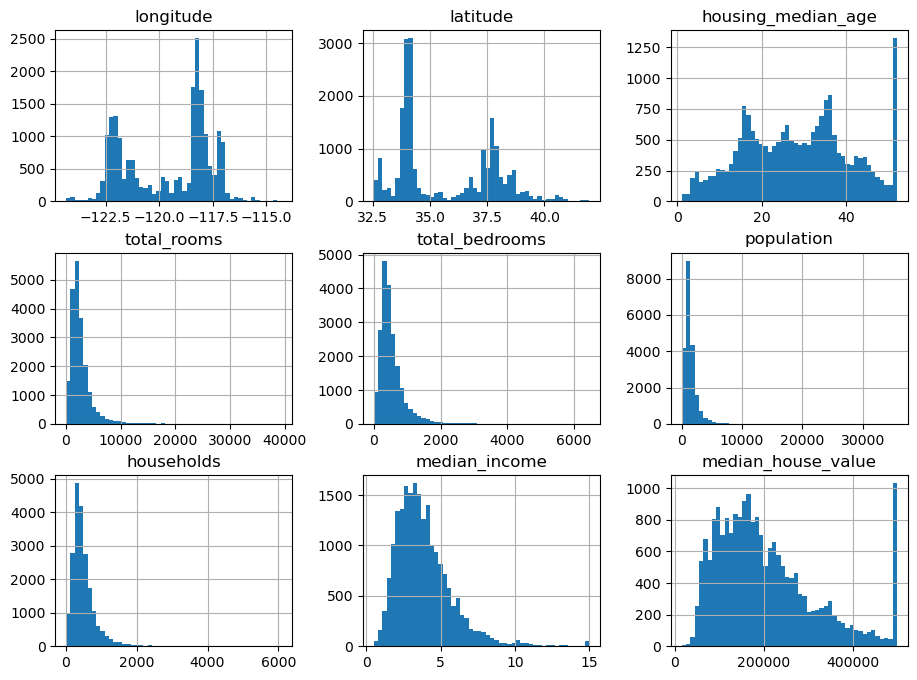

In [14]:
# show the histograms: one histogram corresponds to one column
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(11,8))
plt.show()

In [15]:
#show the histogram of a column
housing["median_income"].hist()

<Axes: >

### Visualize the Data Points 
We will do this using using pandas built-in funciton plot

In [16]:
#each dot represents an area
#the color of a dot shows the median_income in that area
#the size of a dot shows the population in that area
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, 
    label="population",
    c="median_income", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

### visualize the data points on the map of california using matplotlib

In [17]:
# the map is an image,'california.png'
# we need the function imread from the module io of the package skimage
from skimage.io import imread
#load the map
california_img=imread('california.png')
#show the map
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
#show the data points
#set the size of the dots by s=1
#set the color of the dots by color = 'b' - blue
#make the dots to be somewhat transparent by alpha=0.4
plt.scatter(x=housing['longitude'], y=housing['latitude'], 
            color='b',  marker='.', s=1, alpha=0.4)
#add labels to x-axis and y-axis and set fontsize
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

Text(0.5, 47.7222222222222, 'Longitude')

#### Handle the categorical variable "ocean_proximity"
Many machine learning algorithms only accept numerical data (numbers) not categorical data (category names). Thus, we need to convert categorical data into numerical data. <br>
In our table, we have a categorical variable "ocean_proximity". We apply one-hot encoding method (https://en.wikipedia.org/wiki/One-hot) to use numbers to represent different "ocean_proximity", which can be easily done by Pandas.

In [18]:
housing=pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In the new "housing" table, we see five new columns <br>
(1) ocean_proximity_<1H OCEAN <br>
(2) ocean_proximity_INLAND <br>
(3) ocean_proximity_ISLAND <br>
(4) ocean_proximity_NEAR BAY <br>
(5) ocean_proximity_NEAR OCEAN <br>
These columns are filled with 1s and 0s by the one-hot encoding method. <br>
If 'ocean_proximity' is 'NEAR BAY' in the original table, then in the new table, 'ocean_proximity_NEAR BAY' is 1 and the other variables are 0s.

## Your work begins here
complete the following 3 sub-tasks <br>
1. cluster the data points based on locations to find out spatial clusters
2. cluster the data points to find out where high/low income people live
3. run k-means several times for sub-task-2 to see if the result is stable or not (do not fix random_state).

### 1. Cluster By Location
location features: longitude, latitude, ocean_proximity 

In [19]:
#get a new table by selecting columns related to location
#assume the name of the new table is data1
#for example:
data1 = housing[['longitude', 'latitude'] + housing.filter(like='ocean_proximity').columns.tolist()]
data1.head()

,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,False,False,False,True,False
1,-122.22,37.86,False,False,False,True,False
2,-122.24,37.85,False,False,False,True,False
3,-122.25,37.85,False,False,False,True,False
4,-122.25,37.85,False,False,False,True,False


In [20]:
#type of data1 is DataFrame
#convert DataFrame to numpy array

data1=data1.values
type(data1)


numpy.ndarray

In [21]:
#normalize data1 using MinMaxScaler in sk-learn
#assume that data1n is the name of the normalized data1 
#    data1 -> normlainzation -> data1n
#use fit_transform of MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1n = scaler.fit_transform(data1)

data1n[:10]

array([[0.21115538, 0.5674814 , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.21215139, 0.565356  , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.21015936, 0.5642933 , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.5642933 , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.5642933 , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.5642933 , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.56323061, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.56323061, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20816733, 0.56323061, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20916335, 0.56323061, 0.        , 0.        , 0.        ,
        1.        , 0. 

In [22]:
data1n.shape

(20640, 7)

In [23]:
#run k-means on data1n
#set n_clusters to 3
#read the docmument of k-means on sk-learn website
#assume the cluster labels are stored in the array label1

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

label1 = kmeans.fit_predict(data1n)


In [24]:
#show the clusters using different colors
#each cluster is shown by dots with a different color
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,3, figsize=(10,6))
for k in range(0, 3):
    ax[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    ax[k].scatter(x=data1[label1==k,0], y=data1[label1==k,1], 
                  color=color[k],  marker='.', s=1, alpha=0.4)
    ax[k].set_ylabel("Latitude", fontsize=14)
    ax[k].set_xlabel("Longitude", fontsize=14)


In [25]:
#plot the histogram of cluster labels in label1

plt.hist(label1, bins=3)


(array([9136., 6551., 4953.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

## 2. Identify Clusters by Wealth
think about which columns of housing are needed for this sub-task 


In [26]:
#select some columns from housing
#assume the name of the new table is data2

data2 = housing[['longitude', 'latitude', 'median_income', 'median_house_value', 'population']]
data2.head()

,longitude,latitude,median_income,median_house_value,population
0,-122.23,37.88,8.3252,452600.0,322.0
1,-122.22,37.86,8.3014,358500.0,2401.0
2,-122.24,37.85,7.2574,352100.0,496.0
3,-122.25,37.85,5.6431,341300.0,558.0
4,-122.25,37.85,3.8462,342200.0,565.0


In [27]:
#type of data2 is DataFrame
#convert DataFrame to numpy array

data2=data2.values
type(data2)


numpy.ndarray

In [28]:
#normalize data2 using MinMaxScaler

scaler = MinMaxScaler()
data2n = scaler.fit_transform(data2)
data2n[:10]

array([[0.21115538, 0.5674814 , 0.53966842, 0.90226638, 0.00894083],
       [0.21215139, 0.565356  , 0.53802706, 0.70824656, 0.0672104 ],
       [0.21015936, 0.5642933 , 0.46602805, 0.69505074, 0.01381765],
       [0.20916335, 0.5642933 , 0.35469856, 0.67278279, 0.01555537],
       [0.20916335, 0.5642933 , 0.23077613, 0.67463846, 0.01575156],
       [0.20916335, 0.5642933 , 0.24392077, 0.52515454, 0.01149135],
       [0.20916335, 0.56323061, 0.21787286, 0.58597903, 0.03057821],
       [0.20916335, 0.56323061, 0.18069406, 0.46680426, 0.03234396],
       [0.20816733, 0.56323061, 0.1089985 , 0.43649511, 0.03371731],
       [0.20916335, 0.56323061, 0.22008662, 0.50742265, 0.04338687]])

In [29]:
#run k-means on data2n to get cluster labels

kmeans = KMeans(n_clusters=6, random_state=0)
model2 = kmeans.fit(data2n)
label2 = model2.predict(data2n)
center2 = model2.cluster_centers_


In [30]:
#show the clusters using different colors

color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(2,3, figsize=(10,6))
for k in range(0, 6):
    ax[k//3, k%3].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    ax[k//3, k%3].scatter(x=data2[label2==k,0], y=data2[label2==k,1], 
                  color=color[k],  marker='.', s=1, alpha=0.4)
    ax[k//3, k%3].set_ylabel("Latitude", fontsize=14)
    ax[k//3, k%3].set_xlabel("Longitude", fontsize=14)


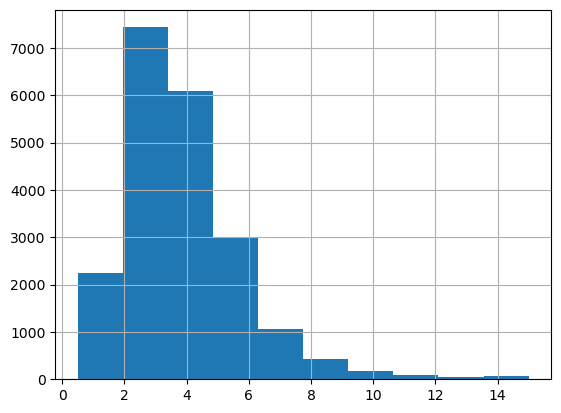

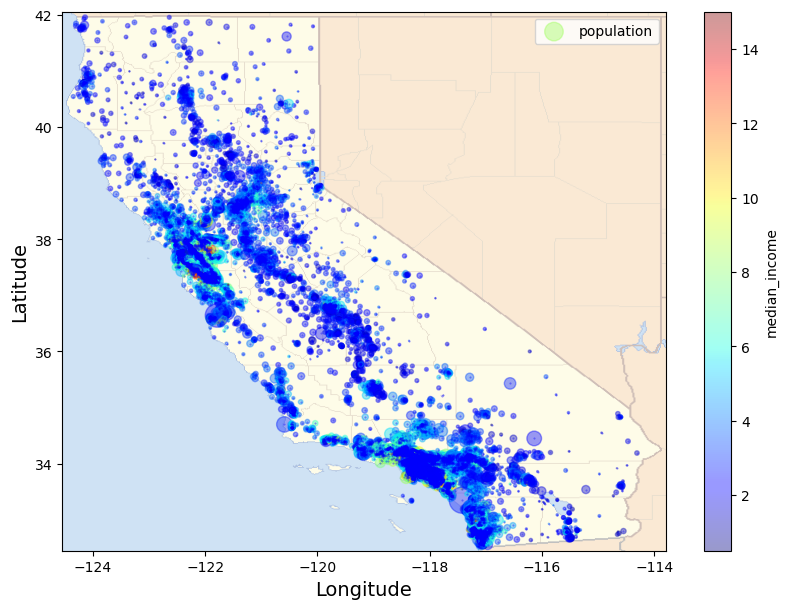

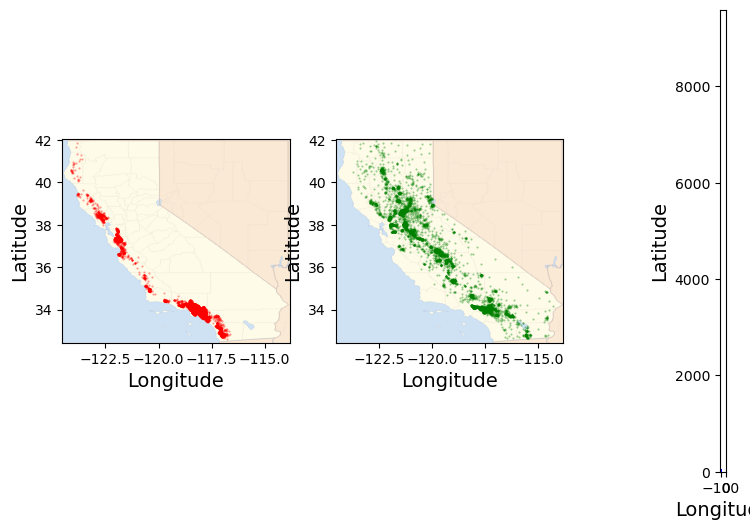

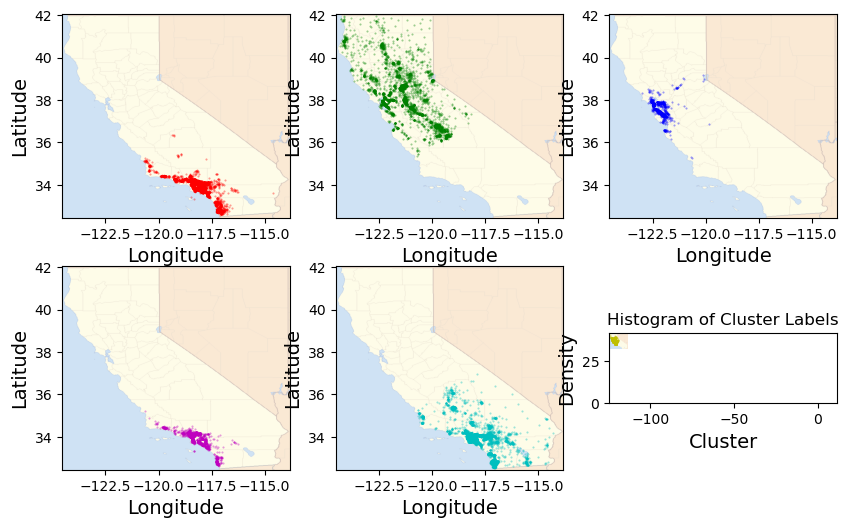

In [31]:
#plot the histogram of cluster labels

plt.hist(label2, bins=6, density=True)
plt.xlabel('Cluster')
plt.ylabel('Density')
plt.title('Histogram of Cluster Labels')
plt.show()

In [32]:
# compute the average value of 'median_income' in each cluster

for k in range(0, 6):
    mhv_k=data2[label2==k, 2]
    mhv_k_mean=mhv_k.mean()
    print('Cluster_'+str(k)+':', mhv_k_mean)


Cluster_0: 4.4063034368333724
Cluster_1: 2.734499715846995
Cluster_2: 6.551093487574979
Cluster_3: 6.707463866584312
Cluster_4: 2.8543838974530833
Cluster_5: 4.285461157826649


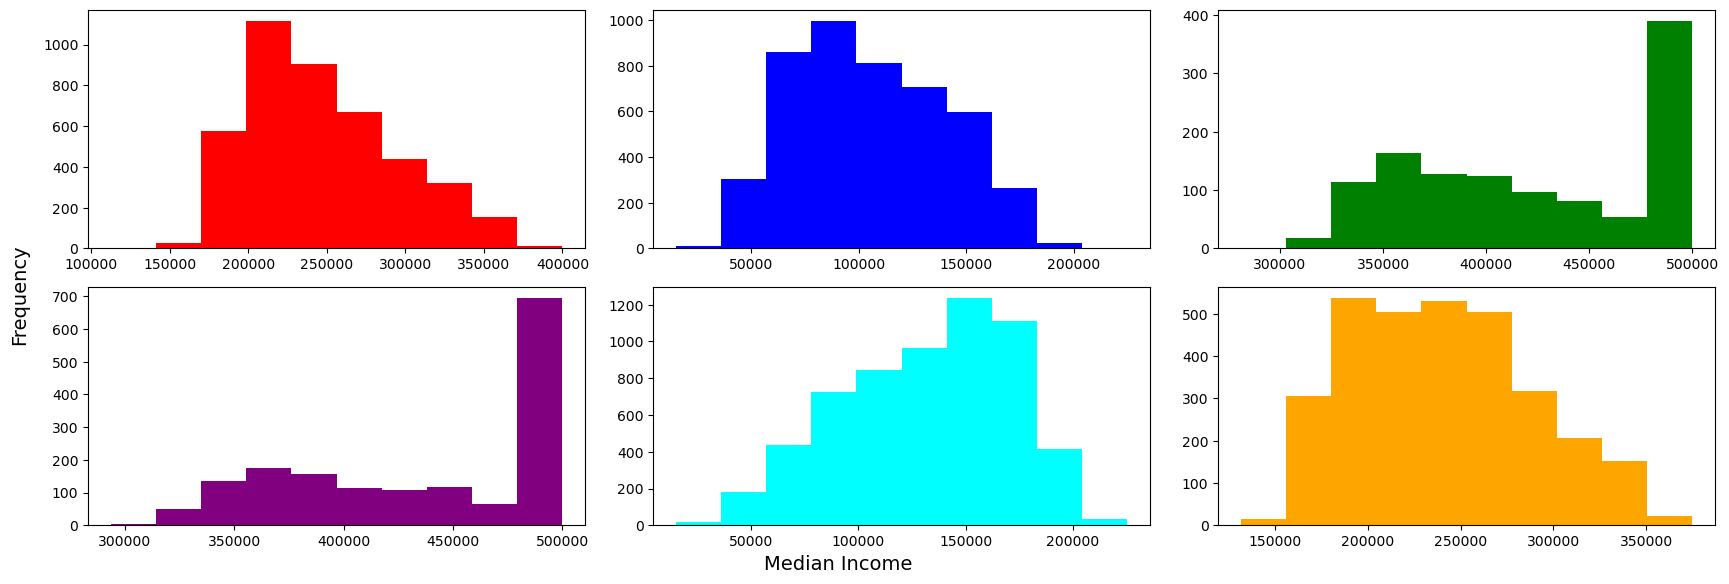

In [33]:
# show the histograms of 'median_income' in each cluster

color=['red', 'blue', 'green', 'purple', 'cyan', 'orange']
fig, ax = plt.subplots(2,3, figsize=(18,6))
for k in range(0, 6):    
    row = k // 3
    col = k % 3
    ax[row, col].hist(x=data2[label2 == k, 3], color=color[k], bins=10)

fig.text(0.5, 0.04, 'Median Income', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


**we can clearly see some clusters of high-income people**

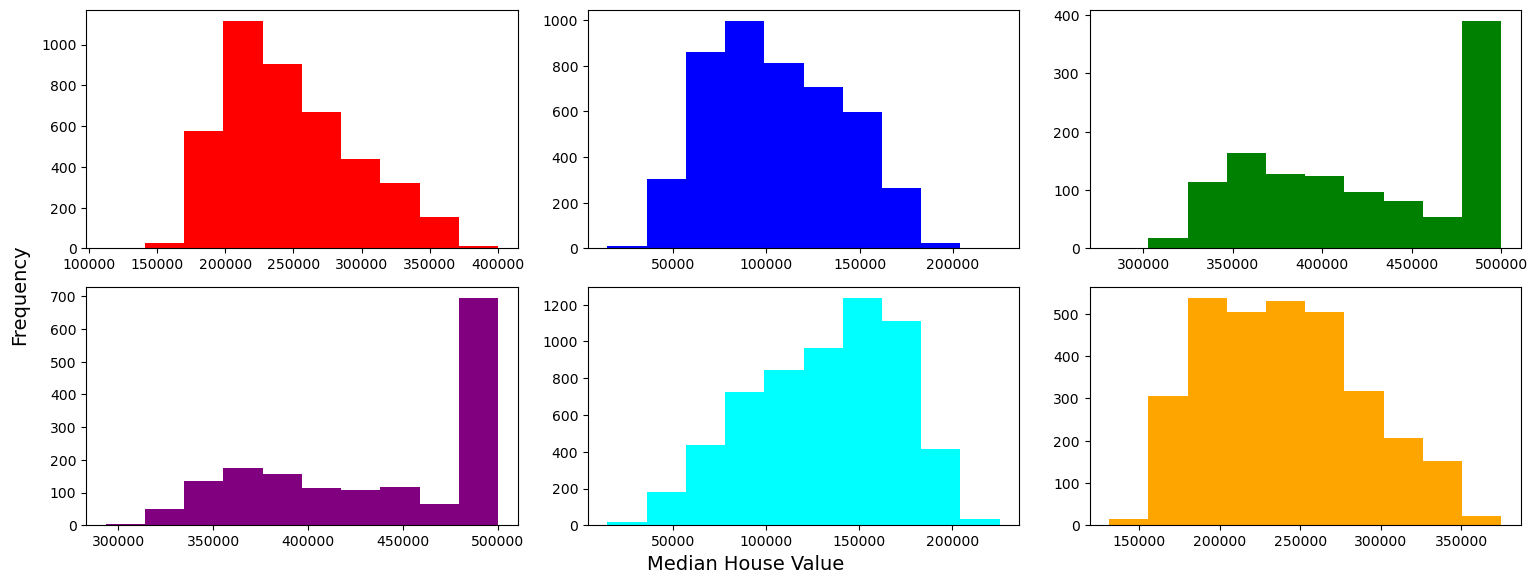

In [34]:
# show the histogram of 'median_house_value' in each cluster

color = ['red', 'blue', 'green', 'purple', 'cyan', 'orange']
fig, ax = plt.subplots(2, 3, figsize=(16, 6))  # Adjusted to 2x3 layout

for k in range(0, 6):
    row = k // 3
    col = k % 3
    ax[row, col].hist(x=data2[label2 == k, 3], color=color[k], bins=10)

fig.text(0.5, 0.04, 'Median House Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


Interesting Note: Some people have low income but live in very expensive houses